In [1]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from sklearn.decomposition import PCA, IncrementalPCA

In [2]:
arff_data = arff.loadarff('../data/TimeBasedFeatures-Dataset-15s.arff')
df = pd.DataFrame(arff_data[0])
df.head()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,9368711.0,16.0,4.0,1564818.0,1549373.0,190205.285714,203290.456522,389822.391917,370323.719754,10.353612,...,267600.198443,1871488.0,1.983656e+06,2195089.0,1.832197e+05,1234883.0,1420565.0,1523088.0,161096.539275,b'CHAT'
1,7340238.0,18.0,4.0,1567554.0,1527893.0,165686.977273,186914.846154,317267.548742,304370.651301,11.580006,...,221462.862028,1491627.0,3.572433e+06,5653239.0,2.942704e+06,1131498.0,1324636.0,1517774.0,273138.379008,b'CHAT'
2,4644225.0,29.0,15.0,1270547.0,1079974.0,165865.178571,195302.130435,329473.126261,300492.588227,11.412022,...,217475.425246,1758922.0,1.758922e+06,1758922.0,0.000000e+00,1079974.0,1079974.0,1079974.0,0.000000,b'CHAT'
3,4978735.0,19.0,8.0,2492050.0,2457286.0,239543.250000,276596.388889,612435.304238,628339.573544,8.034169,...,436959.716436,1710925.0,2.382905e+06,3054885.0,9.503232e+05,1346073.0,1894031.5,2441990.0,774930.342317,b'CHAT'
4,11838189.0,19.0,10.0,3094089.0,3093543.0,243766.500000,295954.725000,599721.781709,625632.703972,7.602514,...,436129.639296,1747431.0,2.400446e+06,3240696.0,6.232744e+05,1394455.0,1983227.0,3042717.0,725987.829075,b'CHAT'


In [3]:
df = df.sample(frac=1)


In [4]:
one_hot_data = pd.get_dummies(df, columns=['class1'])
one_hot_data.head()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,class1_b'P2P',class1_b'STREAMING',class1_b'VOIP',class1_b'VPN-BROWSING',class1_b'VPN-CHAT',class1_b'VPN-FT',class1_b'VPN-MAIL',class1_b'VPN-P2P',class1_b'VPN-STREAMING',class1_b'VPN-VOIP'
2108,34564.0,139.0,-1.0,34425.0,-1.0,17282.000000,0.000000,2.424386e+04,0.000000e+00,86.795510,...,0,0,0,0,0,0,0,0,0,0
1189,249.0,249.0,-1.0,249.0,-1.0,249.000000,0.000000,0.000000e+00,0.000000e+00,8032.128514,...,0,0,0,0,0,0,0,0,0,0
14150,14993095.0,84.0,2.0,5890097.0,5890387.0,535430.214286,428358.400000,1.343572e+06,1.213219e+06,4.335329,...,0,0,0,0,0,0,0,0,0,0
5974,588598.0,33.0,25.0,146701.0,172688.0,5206.262500,5163.865169,2.140122e+04,2.250638e+04,290.520865,...,0,0,0,0,1,0,0,0,0,0
8506,10591231.0,15.0,18.0,8638460.0,8639908.0,94159.797980,264780.775000,8.683969e+05,1.370903e+06,13.312900,...,0,0,0,0,0,1,0,0,0,0


In [5]:
X = df.iloc[:, :-1].values

In [6]:
model1 = PCA(n_components=2)

In [7]:
model1.fit(X)

PCA(n_components=2)

In [8]:
prediction1 = model1.transform(X)

In [9]:
prediction1.shape

(18758, 2)

In [10]:
hot = plt.get_cmap('Paired')
cNorm  = colors.Normalize(vmin=0, vmax=len(df.iloc[:,-1].unique()))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)

In [11]:
def plot_prediction(prediction):
    plt.figure(figsize=(10,10))
    for i, label in enumerate(df.iloc[:,-1].unique()):
        indx = df.iloc[:,-1] == label
        plt.scatter(prediction[indx][:,0], prediction[indx][:,1], label=label, color=scalarMap.to_rgba(i))
        plt.legend(loc='upper right')

    plt.ylabel('PC2')
    plt.xlabel('PC1');

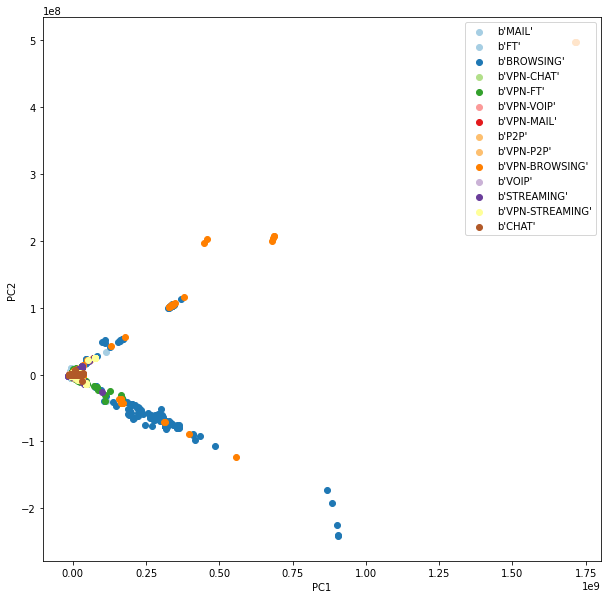

In [12]:
plot_prediction(prediction1)

In [13]:
model2 = IncrementalPCA(n_components=2, batch_size=500)
model2.fit(X)
prediction2 = model2.transform(X)

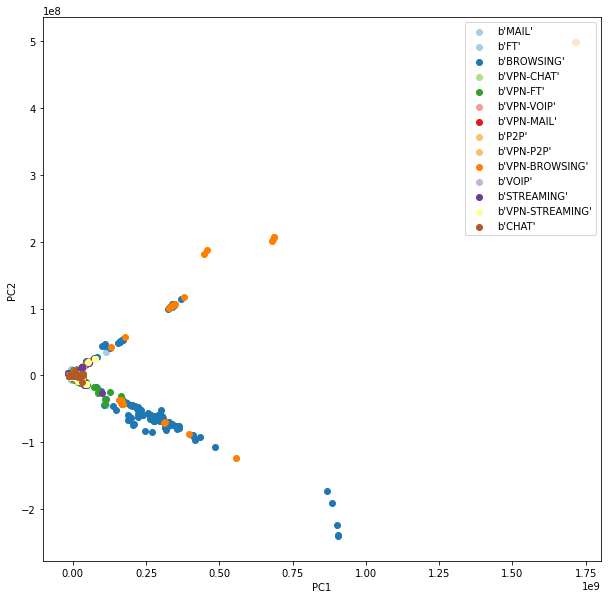

In [14]:
plot_prediction(prediction2)

In [15]:
from sklearn.manifold import TSNE

In [16]:
prediction3 = TSNE(n_components=2).fit_transform(PCA(n_components=7).fit_transform(X))

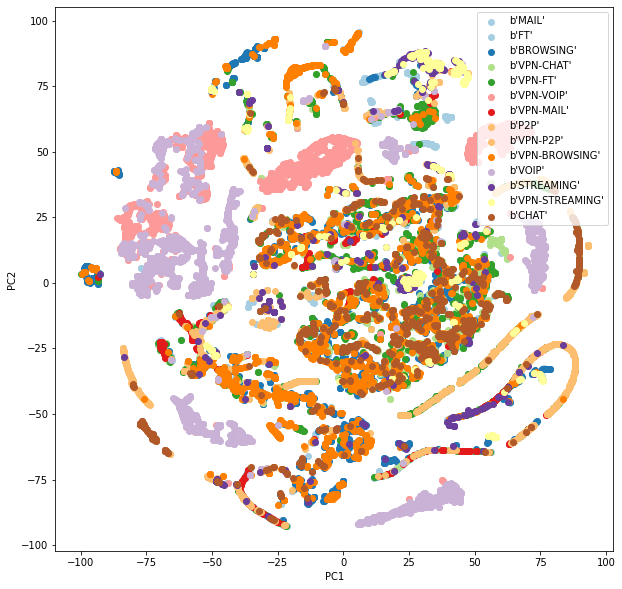

In [17]:
plot_prediction(prediction3)